Лабораторная работа 5

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
file_path = "social-media.csv"  
dataset = pd.read_csv(file_path)

dataset.drop("UserId", axis=1, inplace=True)

factorization_table = {}
dataset["Country"], table = pd.factorize(dataset["Country"])
factorization_table["Country"] = pd.DataFrame({"Country": table})

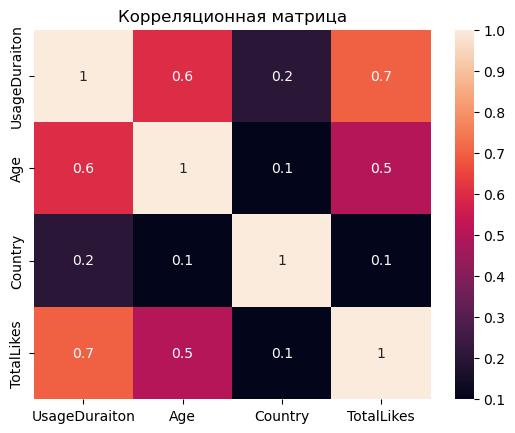

In [5]:
sns.heatmap(round(abs(dataset.corr()), 1), annot=True)
plt.title("Корреляционная матрица")
plt.show()

In [7]:
target_column = "Country" 
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(target_column, axis=1),
    dataset[target_column],
    test_size=0.2,
    random_state=42,
)

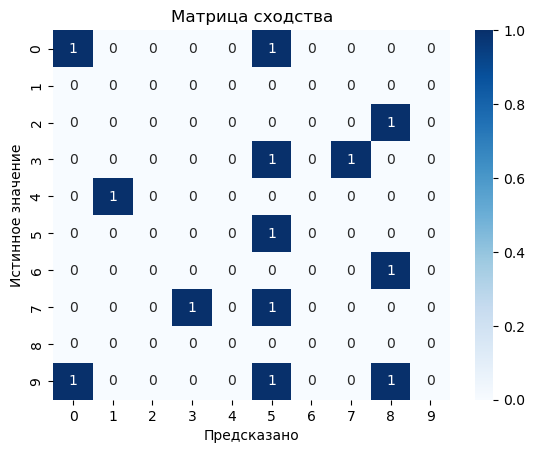

In [9]:
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(train_input, train_output)

predictions = model.predict(test_input)
conf_matrix = confusion_matrix(test_output, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Матрица сходства")
plt.xlabel("Предсказано")
plt.ylabel("Истинное значение")
plt.show()


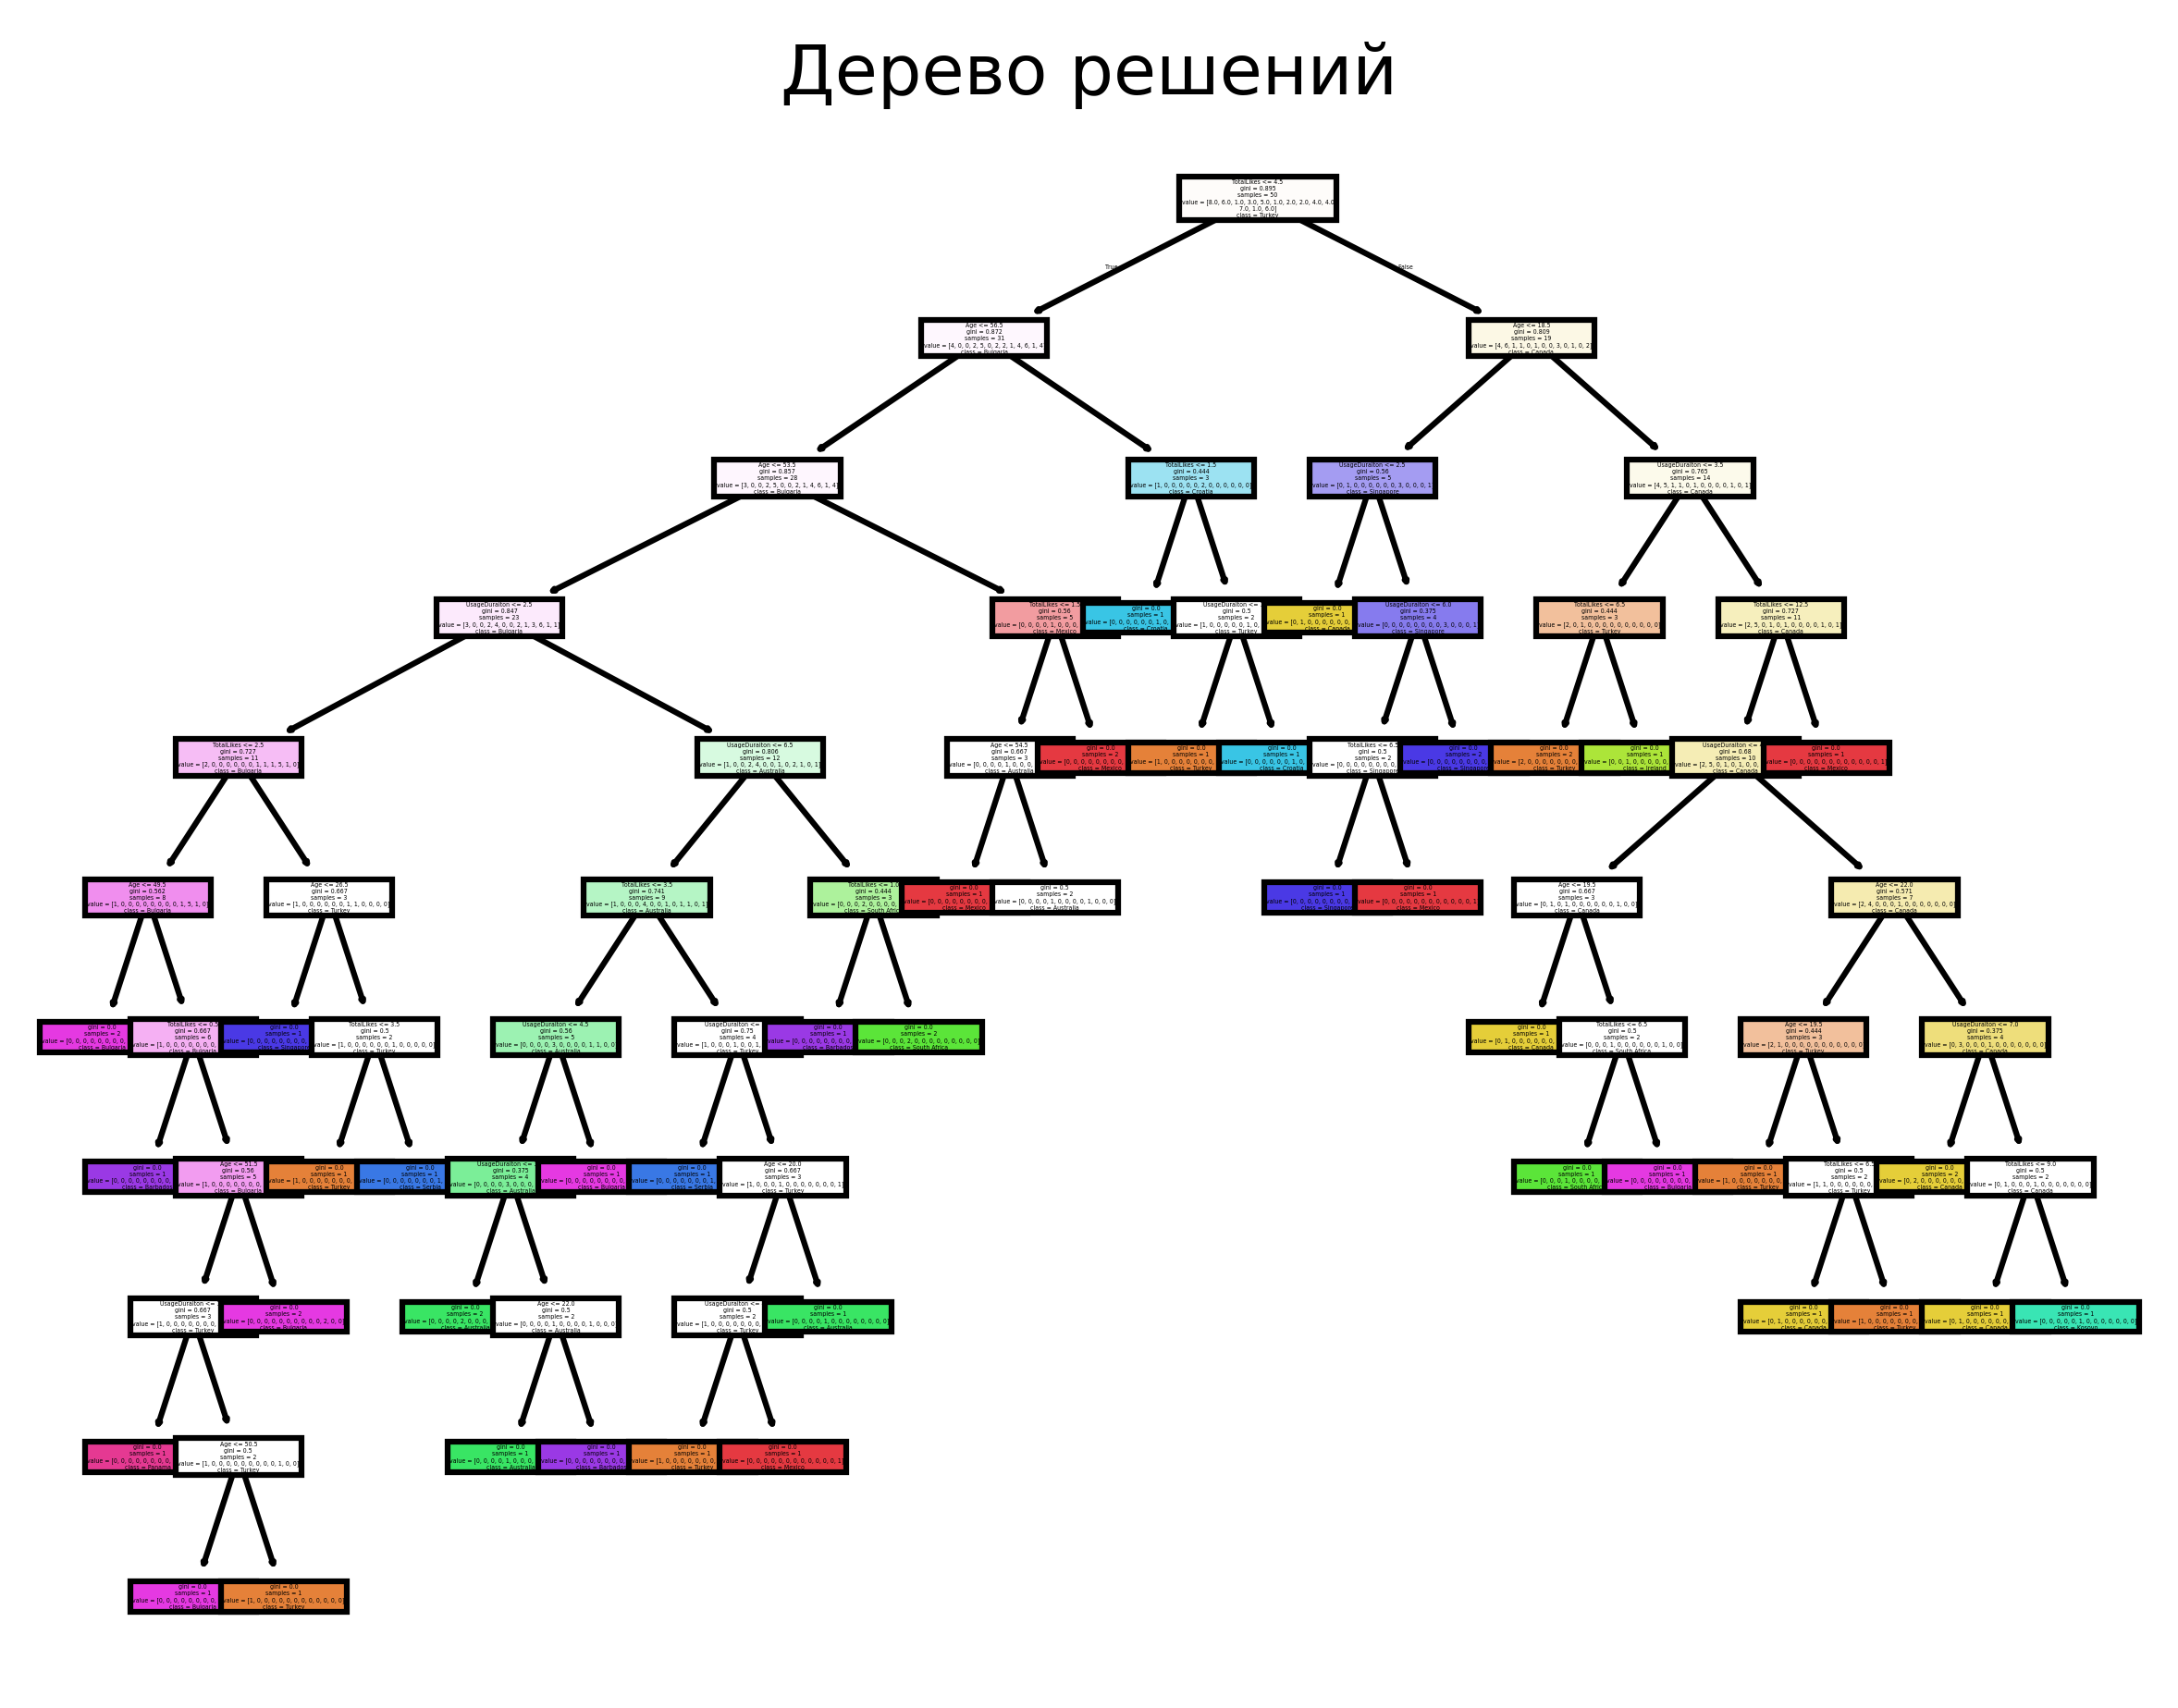

In [11]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model, feature_names=train_input.columns, class_names=table, filled=True)
plt.title("Дерево решений")
plt.show()

In [13]:
print(factorization_table["Country"])

         Country
0         Turkey
1         Canada
2        Ireland
3   South Africa
4      Australia
5         Kosovo
6        Croatia
7         Serbia
8      Singapore
9       Barbados
10      Bulgaria
11        Panama
12        Mexico
13       Germany
